In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dftrain = pd.read_csv('train.csv')

In [4]:
dftest  = pd.read_csv('test.csv')

In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
dftrain.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
dftest.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [8]:
dftrain.Product_Category_2.value_counts(dropna=False)

NaN     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

In [9]:
dftest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [10]:
dftrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
dftrain['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [12]:
dftrain.isnull().sum()/dftrain.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [13]:
dftest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [14]:
dftrain.Purchase.unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

In [15]:
dftest['Purchase'] = 'test'

In [16]:
dftest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,test
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,test
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,test
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,test
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,test


In [17]:
combinedf = pd.concat([dftrain,dftest], axis = 0)

In [18]:
combinedf.shape

(783667, 12)

In [19]:
combinedf['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
combinedf['City_Category'] =  LabelEncoder().fit_transform(combinedf['City_Category'])

In [22]:
combinedf['City_Category'].value_counts()

1    329739
2    243684
0    210244
Name: City_Category, dtype: int64

In [23]:
combinedf['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [24]:
combinedf['Stay_In_Current_City_Years'] =  LabelEncoder().fit_transform(combinedf['Stay_In_Current_City_Years'])

In [25]:
combinedf['Stay_In_Current_City_Years'].value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [26]:
combinedf.Gender.value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [27]:
combinedf.Gender = combinedf.Gender.replace('F',1)

In [28]:
combinedf.Gender = combinedf.Gender.replace('M',0)

In [29]:
combinedf.Gender.value_counts()

0    590031
1    193636
Name: Gender, dtype: int64

In [30]:
combinedf=combinedf.drop('User_ID',axis=1)

In [31]:
combinedf = combinedf.drop('Product_ID', axis = 1)

In [32]:
combinedf.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [33]:
combinedf.isnull().sum()/combinedf.shape[0]*100

Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                       0.000000
dtype: float64

In [34]:
combinedf = combinedf.drop('Product_Category_2', axis = 1)

In [35]:
combinedf = combinedf.drop('Product_Category_3', axis = 1)

In [36]:
combinedf.nunique()

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Purchase                      18106
dtype: int64

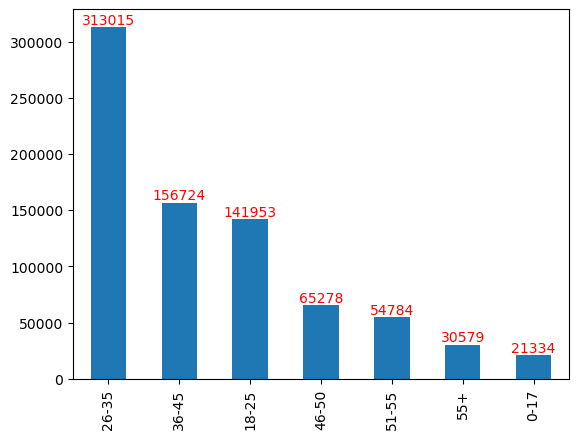

In [37]:
ax = combinedf.Age.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,color = 'red')

In [38]:
combinedf['Age'] = LabelEncoder().fit_transform(combinedf['Age'])

In [ ]:
ax = combinedf.Gender.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [ ]:
plt.figure(figsize=(15,7))
ax = combinedf.Occupation.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,color='red')

In [ ]:
ax = combinedf.City_Category.value_counts().plot(kind='bar')
for i in ax.containers:
        ax.bar_label(i)

In [ ]:
plt.figure(figsize=(20,9))
ax = combinedf.groupby('City_Category').mean(['Purchase']).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [40]:
combinedf.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [41]:
dftrain_clean = combinedf[combinedf.Purchase!='test']
dftest_clean  = combinedf[combinedf.Purchase=='test']

In [42]:
dftest_clean = dftest_clean.drop('Purchase', axis = 1)

In [43]:
dftrain_clean.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1,0,10,0,2,0,3,8370
1,1,0,10,0,2,0,1,15200
2,1,0,10,0,2,0,12,1422
3,1,0,10,0,2,0,12,1057
4,0,6,16,2,4,0,8,7969


In [44]:
dftest_clean.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,0,4,7,1,2,1,1
1,0,2,17,2,0,0,3
2,1,3,1,1,4,1,5
3,1,3,1,1,4,1,4
4,1,2,1,2,1,0,4


In [52]:
dftrain_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  int64 
 1   Age                         550068 non-null  int32 
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  int32 
 4   Stay_In_Current_City_Years  550068 non-null  int32 
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category_1          550068 non-null  int64 
 7   Purchase                    550068 non-null  object
dtypes: int32(3), int64(4), object(1)
memory usage: 31.5+ MB


In [46]:
X = dftrain_clean[['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']]
y = dftrain_clean['Purchase']

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
reg = LinearRegression()

In [51]:
regmodel = reg.fit(X,np.log(y))

TypeError: loop of ufunc does not support argument 0 of type int which has no callable log method

In [50]:
regmodel.score(X,y)

0.12441328497760973

In [ ]:
regmodle2 = reg.fit(X,y)

In [ ]:
regmodel_predict = regmodel.predict(X)

In [ ]:
regmodel_resid = y-regmodel_predict

In [ ]:
np.sqrt(np.mean(regmodel_resid**2))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y,regmodel_predict))

In [ ]:
# Prediction of test data which did not have dependent variable
reg_test_predict = regmodel.predict(dftrain_clean)

In [ ]:
dftrain_clean.info()

In [ ]:
dftrain_clean['Purchase'] =  dftrain_clean['Purchase'].astype('float64')

In [ ]:
dftrain_clean.info()